In [1]:
from IPython.core.display import HTML as Center

Center(
""" 
<style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
        
    }
    
    .dataframe{
        font-size: 120% !important;
        margin-left: auto !important;
        margin-right: auto !important;
    }
    
    .dataframe thead th {
        text-align: center !important;
    }
</style> 
""")

$
\newcommand{\nc}{\newcommand} 
\nc{\t}{\text}
\nc{\tb}{\textbf}
\nc{\ti}{\textit}
$

# $$\textbf{Python Programming for Machine Learning} $$ 

## $$\t{PyTorch, Pandas}$$

#### $$\text{Winter Semester 2022/23}$$

#### $$\text{Sergej Dogadov and Panagiotis Tomer Karagianis}$$

<center>
<img src='images/pyt.png' width=450>

<center>
<img src='./images/torch.png'  width='600'/>
    
</center>


 * $\t{PyTorch is a GPU accelerated tensor computational framework.}$
 


In [28]:
# conda install -c pytorch pytorch (depends on your hardware and software)

import torch as tr

# NVIDIA GPU required 
with_cuda = tr.cuda.is_available()
device = 'cuda:0' if with_cuda else 'cpu'

print(f'PyTorch version: {tr.__version__} with CUDA {with_cuda} on device {device}')

PyTorch version: 1.13.0 with CUDA True on device cuda:0


In [33]:
# Init tensor from list, tuple or some iterables

vals = [1, 2, 4.5, 4]
#vals = tuple(vals)
#vals = range(4)

x = tr.Tensor([lst])

type(x), x, x.dtype

(torch.Tensor, tensor([[1.0000, 2.0000, 4.5000, 4.0000]]), torch.float32)

## $$\tb{Initialize on a Device}$$
<hr>

In [35]:
devices = ["cuda:0", "cuda:1"] # suppose your system has multiple GPUs

In [37]:
import numpy as np
a = np.random.normal(0, 1, size=(4,3))

device = devices[0] # getting fist device name

X = tr.from_numpy(a).to(device) # moving the X values to GPU memory 

# equiv. 
#X = tr.from_numpy(a).cuda() # in case there is only one known GPU

type(X), X, X.device

(torch.Tensor,
 tensor([[-0.1772, -0.0420,  1.2241],
         [-1.1603, -0.9774,  2.0366],
         [-0.6707, -2.3073, -0.7569],
         [ 0.7517, -0.9424, -0.3249]], device='cuda:0', dtype=torch.float64),
 device(type='cuda', index=0))

In [38]:
X_np = X.cpu().numpy() # moving the allocated memory to RAM for cpu processing

type(X_np), X.device

(numpy.ndarray, device(type='cuda', index=0))

## $$\tb{Python-like indexing and slicing}$$
<hr>

In [39]:
# Indexing
X[0], X[:, -1]

(tensor([-0.1772, -0.0420,  1.2241], device='cuda:0', dtype=torch.float64),
 tensor([ 1.2241,  2.0366, -0.7569, -0.3249], device='cuda:0',
        dtype=torch.float64))

In [40]:
# Slicing over an axis
X_sub = X[:, 1:3]
X_sub, X_sub.shape

(tensor([[-0.0420,  1.2241],
         [-0.9774,  2.0366],
         [-2.3073, -0.7569],
         [-0.9424, -0.3249]], device='cuda:0', dtype=torch.float64),
 torch.Size([4, 2]))

In [41]:
# Adding a dimension
X_sub = X_sub[:, None]

# equiv.
#X_sub = X_sub.unsqueeze(1) # squeeze to get rid of 1

X_sub.shape, X_sub.squeeze().shape

(torch.Size([4, 1, 2]), torch.Size([4, 2]))

## $$\tb{Transposition and reshape}$$
<hr>

In [43]:
#    axis indexes: (0, 1, 2, 3)
A = tr.randn(size=(3, 2, 5, 2)) # randn similar to np.random.normal(0,1) but Tensor is returned

A_transpose = A.transpose(2, 0) # dim1, dim2 to flip
A_transpose.shape


torch.Size([5, 2, 3, 2])

* $\t{Reorder of multiple dimensions}$

In [44]:
A_new = A.permute(3, 0, 2, 1) # define a new axis order
A_new.shape

torch.Size([2, 3, 5, 2])

In [45]:
# reshape is similar to Numpy
A_ = A.reshape(15, -1)
A_transpose = A_transpose.reshape(-1, 15)

A_.shape, A_transpose.shape

(torch.Size([15, 4]), torch.Size([4, 15]))

## $$\tb{Dot products}$$
<hr>

In [48]:
A_ = A.reshape((3, -1))
A_.shape

torch.Size([3, 20])

* $\t{Matrix dot product}$

In [49]:
A2 = A_@ A_.T

#equiv.
#A2 = A_.matmul(A_.T)

#equiv.
#tr.matmul(A_, A_.T, out=A2) # output tensor defined inside the matmul function
A2.shape

torch.Size([3, 3])

In [50]:
A_ = A.reshape([3, 4, 5])
B_ = A.reshape([4, 5, 3])
A_.shape, B_.shape

(torch.Size([3, 4, 5]), torch.Size([4, 5, 3]))

* $\t{Tensor dot product}$

In [52]:
A2 = tr.tensordot(A_, B_, dims = ([1, 2], [0, 1])) # dims specifies axis for the inner product 
A2.shape

torch.Size([3, 3])

## $$\tb{Linear Algebra with Tensors}$$
<hr>

In [58]:
# Tensor inversion
A2_inv = tr.linalg.inv(A2) # A2 shape is (M,N) then the comp complexity is O( M*N**2) 
R = A2 @ A2_inv

In [59]:
tr.set_printoptions(precision=3, sci_mode=False)
print(R)

d = A2.shape[0]
I = tr.diag(tr.ones(d))

print(I, 'Shape:', (d, d))

assert tr.allclose(R, I, atol=1e-5)

tensor([[     1.000,      0.000,      0.000],
        [     0.000,      1.000,     -0.000],
        [    -0.000,     -0.000,      1.000]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) Shape: (3, 3)


* $\t{Solve a system of linear equations}$

In [60]:
A = tr.Tensor(
    [
        [3, 1],
        [1, 2]
    ]).cuda()

B = tr.Tensor([9, 8]).cuda()

X = tr.linalg.solve(A, B)

print(B, A @ X)

assert tr.allclose(A @ X, B)

tensor([9., 8.], device='cuda:0') tensor([9., 8.], device='cuda:0')


## $$\tb{Single element Tensors}$$
<hr>

In [62]:
# Sum of elements
R_sum = R.sum()

R_item = R_sum.item()

print(R_sum, R_item, type(R_sum), type(R_item))

assert tr.isclose(R_sum, tr.Tensor([d])) # both needs to be Tensors therefore create a 1-element Tensor

assert np.isclose(R_item, d, atol=1e-5) # floats are OK

tensor(3.000) 2.999999523162842 <class 'torch.Tensor'> <class 'float'>


# $$ \textbf{Benchmark function on PyTorch}$$
<hr> 
<br>

In [63]:
from time import time

def benchmark_np(n):
    
    # same initialization as before
    X = np.ones((n, n))
    Y = np.copy(X) # matrix of the shape X with ones
    
    # actual (measured) matrix multiplication
    start = time()
    Z = X @ Y # @ is a shortcut for np.dot 
    end = time()
    
    return end - start

In [64]:
def benchmark_gpu(n):
    
    # Tensor object initialization
    X = tr.ones((n, n)).float().to(device) # creates a float tensor of ones + shifts it to a GPU
    Y = tr.ones((n, n)).float().to(device) 
    
    # actual (measured) matrix multiplication
    start = time()
    Z = X @ Y # dot product in PyTorch
    end = time()
    
    return end-start

In [65]:
size = 4096
benchmark_np(size), benchmark_gpu(size)

(0.7914762496948242, 0.0009295940399169922)

In [66]:
max_power = 12
sizes =  2 ** np.arange(4, max_power+1)
sizes

array([  16,   32,   64,  128,  256,  512, 1024, 2048, 4096])

In [67]:
# collect the elapsed computational times on CPU and GPU
np_t = [benchmark_np(size) for size in sizes]
gpu_t = [benchmark_gpu(size) for size in sizes]

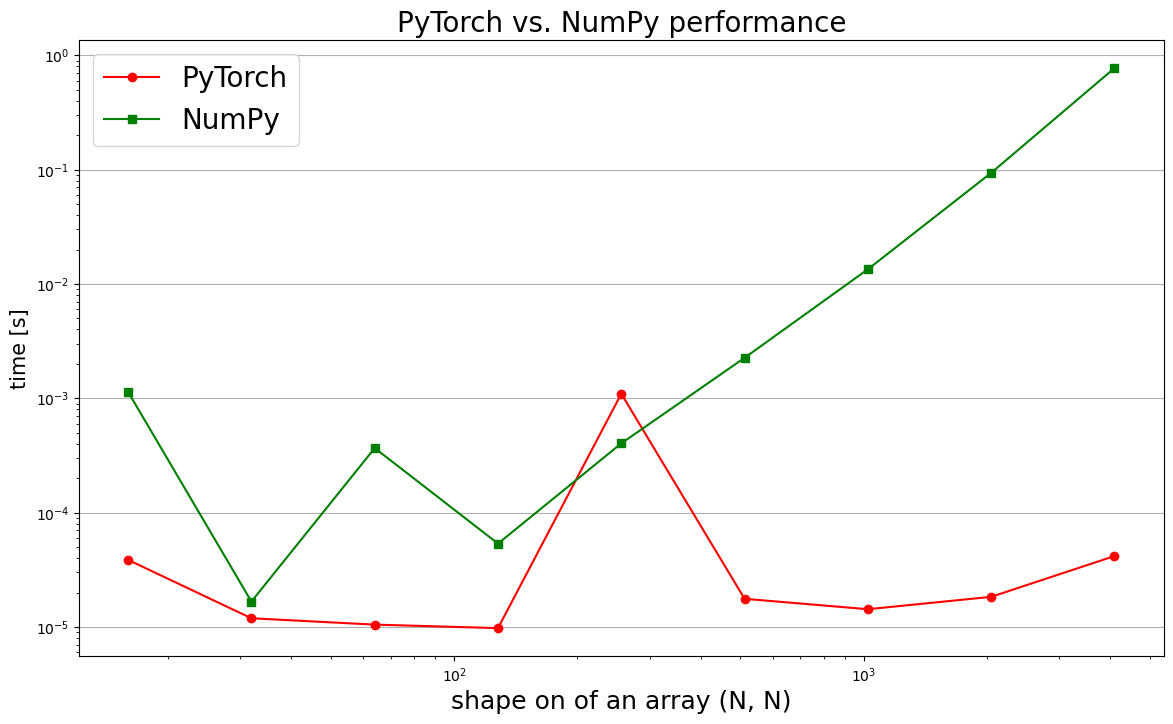

In [73]:
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(14, 8)).gca()
ax.plot(sizes, gpu_t, 'o-', label='PyTorch', color='red')
ax.plot(sizes, np_t, 's-', label='NumPy', color='green')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('shape on of an array (N, N)', fontsize=18)
ax.set_ylabel('time [s]', fontsize=15)

ax.set_title('PyTorch vs. NumPy performance', fontsize=20)

ax.grid(axis='y') # grid with along an y axis
ax.legend(loc=2, fontsize=20);  # location within hhe second quadrant

# $$ \textbf{Optimization with PyTorch}$$
<hr> 
<br>

In [74]:
# arbitrary complex function
f = lambda x, y : ((x**2 -1 ) + (y**2 - 4 ) + (x**2 - 1) * (y**2 -  4 )) / (x**2 + y**2 + 1)**2

In [76]:
# Create a meshgrid
xval, yval = 3, 2

x, y = np.mgrid[-xval:xval:.01, -yval:yval:.01]
print(x.shape, y.shape)

# Calc function values over the grid
z  = f(x,y)
z.shape

(600, 400) (600, 400)


(600, 400)

# $$ \textbf{3-D function plot}$$
<hr> 
<br>

In [79]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
from matplotlib import cm

<IPython.core.display.Javascript object>


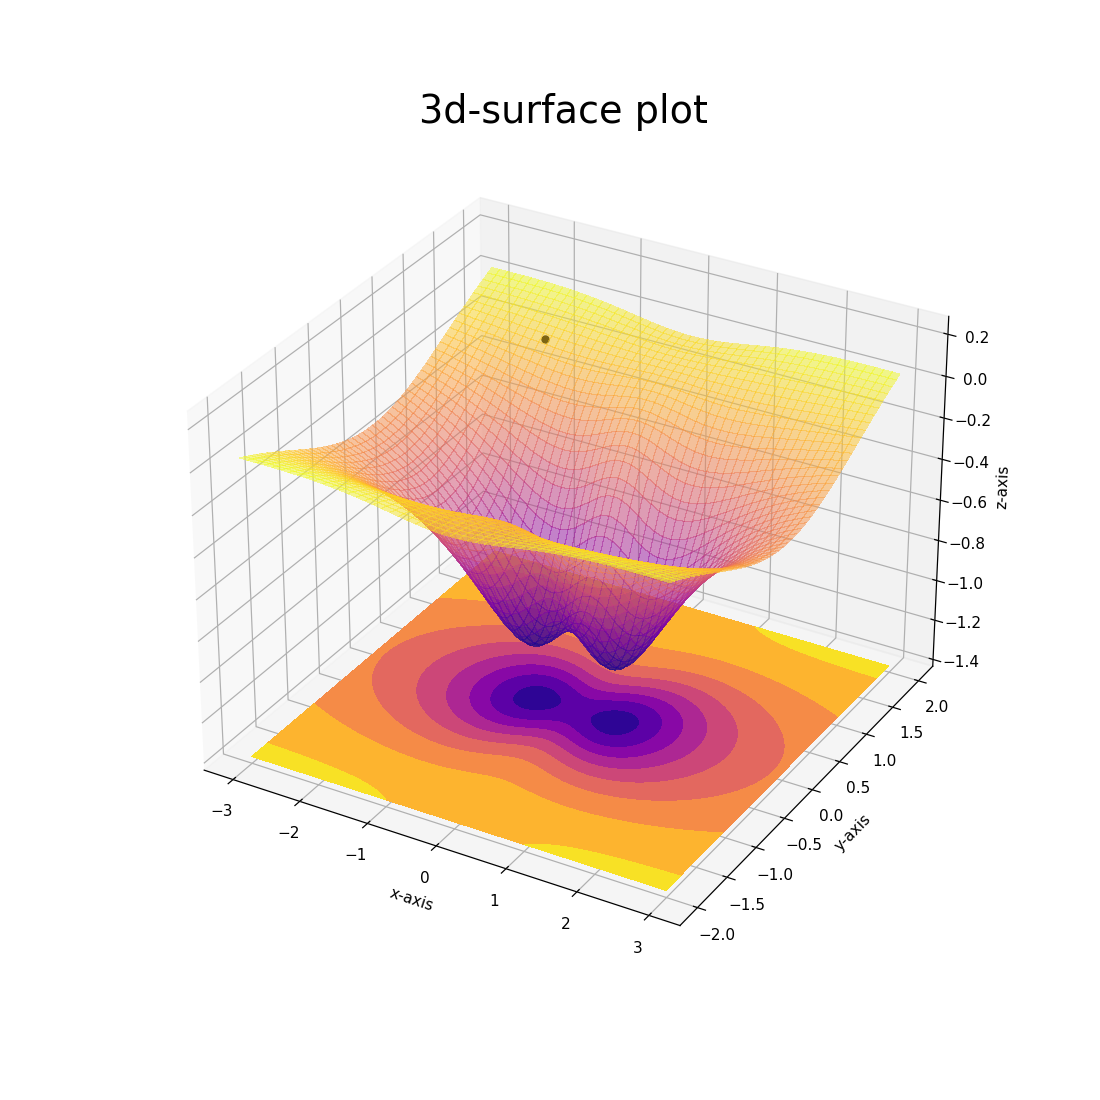

In [80]:
#Enable 3d plot interactions
%matplotlib notebook

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, cmap='plasma', linewidth=0, antialiased=False, alpha=0.5)

ax.contourf(x, y, z, zdir='z', offset=-1.4, cmap='plasma')
ax.set(zlim=(-1.4, 0.25), xlabel='x-axis', ylabel='y-axis', zlabel='z-axis')
ax.set_title('3d-surface plot', fontsize=25)

xval = -1.5
yval = 1.2
zval = f(xval, yval) + 0.2

ax.scatter(xval, yval, zval, c='k')

# $$ \textbf{Optimization parameters}$$
<hr> 
<br>

In [83]:
x_p = tr.Tensor([1.4])
y_p = tr.Tensor([2])

parameters = [x_p, y_p]
parameters = [p.requires_grad_() for p in parameters]

[print(p) for p in parameters];

#get rid of the outdated values stored on your GPU  cache
tr.cuda.empty_cache()

tensor([1.400], requires_grad=True)
tensor([2.], requires_grad=True)


In [84]:
# Define optimizer
from torch.optim import SGD

optimizer = SGD(parameters, lr=1e-1)

# $$ \textbf{Optimization scheduler}$$
<hr> 
<br>

In [85]:
n_epochs = 100

decay_rate = 0.95
decay_every = 10

milestones = np.arange(decay_every, n_epochs+1, decay_every)
milestones

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [86]:
from torch.optim.lr_scheduler import MultiStepLR

scheduler_kwargs = {
    "milestones": milestones,
    "gamma": decay_rate
}

scheduler = MultiStepLR(optimizer, **scheduler_kwargs)

# $$ \textbf{Iterative optimization}$$
<hr> 
<br>

In [87]:
print_every = 10

get_lr = lambda optimizer: [param_group['lr'] for param_group in optimizer.param_groups][0]

for epoch in range(1, n_epochs+1):
    optimizer.zero_grad()
    
    z = f(*parameters)
    if epoch % print_every == 0:
        print(f"Epoch {epoch:3d} loss {z.item():0.3f} lr: {get_lr(optimizer):0.5f}")
    
    z.backward()
    
    optimizer.step()
    scheduler.step()
    
print(50*'_')
print(f"Min val: {z.item():0.3f} at x: {parameters[0].item():0.3f} y: {parameters[1].item():0.3f}")

Epoch  10 loss -0.003 lr: 0.10000
Epoch  20 loss -0.046 lr: 0.09500
Epoch  30 loss -0.129 lr: 0.09025
Epoch  40 loss -0.328 lr: 0.08574
Epoch  50 loss -0.756 lr: 0.08145
Epoch  60 loss -1.071 lr: 0.07738
Epoch  70 loss -1.121 lr: 0.07351
Epoch  80 loss -1.125 lr: 0.06983
Epoch  90 loss -1.125 lr: 0.06634
Epoch 100 loss -1.125 lr: 0.06302
__________________________________________________
Min val: -1.125 at x: 0.579 y: 0.000


## $$\textbf{Working with source data efficiently}$$
<hr>
<br> 


<center>
    <img src='./images/pan.png' width=500>    
</center>

## $$\textbf{Data Series}$$
<hr>
<br> 

* $\text{Specialization of } \textbf{Python} \text{ dictionary.}$

In [88]:
# conda install -c anaconda pandas

import pandas as pd

In [91]:
lst = [0, 2, 4., 6]

data = pd.Series(lst, index=10*np.arange(len(lst))) # arbitraty index (unique key) could be used
data

0     0.0
10    2.0
20    4.0
30    6.0
dtype: float64

In [92]:
type(data), data.index, data.values

(pandas.core.series.Series,
 Int64Index([0, 10, 20, 30], dtype='int64'),
 array([0., 2., 4., 6.]))

## $$\textbf{Indexing over a data Series}$$
<hr>
<br> 

In [93]:
# Indexing

print(data[20]) # getting one element by index value (like a key)

print(30*'=')
print(data[:2]) # slices over the indexes

print(30*'=')
print(data[[True, False, True, False]]) # using a boolen mask or a result from conditional expressions


4.0
0     0.0
10    2.0
dtype: float64
0     0.0
20    4.0
dtype: float64


In [94]:
data[(data.index >= 10) & (data.index < 30)]

10    2.0
20    4.0
dtype: float64

## $$\textbf{Data Series from Dictionary}$$
<hr>
<br> 

In [95]:
dct = { 3 : 'three', 1 : 'one', 2 : 'two', 0 : 'zero'}
pd.Series(dct)


3    three
1      one
2      two
0     zero
dtype: object

In [96]:
pd.Series(dct, index = [0, 2, 3]) # keys to be taken from the dict

0     zero
2      two
3    three
dtype: object

## $$\textbf{DataFrame object}$$
<hr>
<br> 

* $\text{Generalization of a } NumPy \ 2d\text{-array with both arbitrary row and
column names}$

In [97]:
# Let's create two Series objects

ages_dct = {'Anna': 19, 'Bob': 28, 'Carl': 23}
ages = pd.Series(ages_dct)

iqs_dct = {'Anna': 129, 'Bob': 117, 'Carl': 123}
iqs = pd.Series(iqs_dct)

In [100]:
persons = {'age' : ages, 'iq' : iqs}
# Create a DataFrame from dict
persons = pd.DataFrame(persons) 
print(type(persons))
persons

<class 'pandas.core.frame.DataFrame'>


,age,iq
Anna,19,129
Bob,28,117
Carl,23,123


## $$\textbf{Adding a new column}$$
<hr>
<br> 

In [103]:
persons['gender'] = ['f', 'm', 'm'] # provide values for a new column
persons

,age,iq,gender
Anna,19,129,f
Bob,28,117,m
Carl,23,123,m


In [104]:
print(persons.index)
print(10*'=')
print(persons.columns)

Index(['Anna', 'Bob', 'Carl'], dtype='object')
Index(['age', 'iq', 'gender'], dtype='object')


## $$\textbf{Init DataFrame from a file}$$
<hr>

In [109]:
import os 

filepath = os.path.join('./data', 'presidents_height.csv')
print(filepath)
presidents = pd.read_csv(filepath, sep=',')


./data/presidents_height.csv


In [110]:
presidents.tail(3)

,order,name,height(cm)
39,42,Bill Clinton,188
40,43,George W. Bush,182
41,44,Barack Obama,185


In [111]:
#rename column
presidents = presidents.rename(columns={"height(cm)": "cm", "name": "full_name"})
presidents.head(3)

,order,full_name,cm
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189


## $$\textbf{Concatenation of DataFrames}$$
<hr>

In [112]:
last_order = presidents.order.max()

def add_to(presidents, name, height, inc_order=1):
    
    president_info = [presidents.order.max() + inc_order, name, height]
    
    # transposition is used to make a row entry
    new_president = pd.DataFrame(president_info, index=presidents.columns).T 
    
    print(new_president)
    
    # concatenation can be applied along an axis
    presidents = pd.concat([presidents, new_president], ignore_index=True) # to extend old indexes
    
    return presidents

In [113]:
presidents = add_to(presidents, name="Donald Trump", height=190)

presidents = add_to(presidents, name="Joe Biden", height=182)

  order     full_name   cm
0    45  Donald Trump  190
  order  full_name   cm
0    46  Joe Biden  182


In [114]:
presidents.tail(3)

,order,full_name,cm
41,44,Barack Obama,185
42,45,Donald Trump,190
43,46,Joe Biden,182


In [115]:
print(f"Avg height: {presidents.cm.mean():0.1f} cm")

Avg height: 180.0 cm


## $$\textbf{MovieLens data}$$
<hr>
<br> 

In [116]:
headers = ['user_id', 'movie_id', 'rating', 'timestamp']
# provide your own column names
movies = pd.read_csv('./data/u.data', delimiter='\t', names=headers)

In [118]:
movies.head(5)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


## $$\textbf{Get info about the loaded data}$$
<hr>
<br> 

In [124]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


## $$\textbf{Get statistics}$$
<hr>
<br> 

In [128]:
# get default statistics about the data frame
descr_df = movies.describe()
descr_df      #.rating get access to a column as atribute

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [129]:
# summary of the values over one specific columns
movies.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

## $$\textbf{Retrieve the specified rows}$$
<hr>
<br> 

In [130]:
# slicing over the rows
movies[3:6]  # note that the range is exclusive (till-1)

#movies.iloc[3:6] # equiv 

,user_id,movie_id,rating,timestamp
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806


In [131]:
movies.loc[3:6] # use loc for the inclusive range

,user_id,movie_id,rating,timestamp
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488


In [132]:
# get a subset of rows by an index list
movies.loc[[5, 3, 7]] # iloc has no difference in this case

,user_id,movie_id,rating,timestamp
5,298,474,4,884182806
3,244,51,2,880606923
7,253,465,5,891628467


## $$\textbf{Filtering}$$
<hr>
<br> 

In [134]:
# ampersand for conditional_and 
# vertical bar for conditional_or
movie_7 = movies[(movies.rating < 5) & (movies.rating >= 2) | (movies.timestamp > 881250949)]
movie_7.head(3)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
3,244,51,2,880606923


In [135]:
movie_7.rating.mean()

3.4442108594421086

## $$\textbf{Time stamp to date and time }$$
<hr>
<br> 

In [136]:
movies['date'] = pd.to_datetime(movies.timestamp, unit='s') # creates a datetime object in each entry

# Delete unnecessary columns
del movies['timestamp']

In [138]:
movies.sample(3)

,user_id,movie_id,rating,date
35188,120,1,4,1998-03-10 00:40:12
34707,522,79,3,1997-10-16 00:13:44
58854,751,386,3,1998-03-07 19:31:18


## $$\textbf{Date and Time}$$
<hr>
<br> 

* $\t{Split the date and time}$

In [139]:
movies['dt'] = movies['date'].dt.date
movies['time'] = movies['date'].dt.time
movies.sample(3)

,user_id,movie_id,rating,date,dt,time
46921,694,121,5,1997-10-01 17:28:06,1997-10-01,17:28:06
3145,201,37,2,1998-01-06 19:23:55,1998-01-06,19:23:55
98058,647,174,4,1997-10-11 00:46:24,1997-10-11,00:46:24


* $\t{Split the date in hours, minutes and seconds}$

In [140]:
movies['year'] = movies['date'].dt.year
movies['month'] = movies['date'].dt.month
movies['day'] = movies['date'].dt.day
movies.sample(3)

,user_id,movie_id,rating,date,dt,time,year,month,day
12817,117,628,5,1997-12-01 21:36:14,1997-12-01,21:36:14,1997,12,1
44385,35,333,4,1997-09-28 15:03:37,1997-09-28,15:03:37,1997,9,28
95017,556,321,4,1997-12-14 21:46:34,1997-12-14,21:46:34,1997,12,14


* $\t{Split the time in hours, minutes and seconds}$

In [141]:
movies['hour'] = movies['date'].dt.hour
movies['minute'] = movies['date'].dt.minute
movies['second'] = movies['date'].dt.second

In [142]:
del movies['date']
movies.sample(3)

,user_id,movie_id,rating,dt,time,year,month,day,hour,minute,second
76200,767,170,5,1998-04-01,20:31:57,1998,4,1,20,31,57
96789,833,180,5,1997-09-24,17:54:37,1997,9,24,17,54,37
49220,405,1297,1,1998-01-23,09:09:37,1998,1,23,9,9,37


## $$\textbf{Sorting}$$
<hr>
<br> 

* $\t{Sort values by date, hour and minute in ascending order}$

In [143]:
# use inplace=False to keep the original order
movies.sort_values(['dt', 'hour', 'minute'], ascending=False, inplace=True) 
movies.head(3)

,user_id,movie_id,rating,dt,time,year,month,day,hour,minute,second
42973,683,248,4,1998-04-22,23:10:03,1998,4,22,23,10,3
46574,729,328,3,1998-04-22,23:10:38,1998,4,22,23,10,38
46773,729,689,4,1998-04-22,23:10:38,1998,4,22,23,10,38


* $\t{Reset index to fix the sorted order}$

In [144]:
movies.reset_index(drop=True, inplace=True)
movies.head(3)

,user_id,movie_id,rating,dt,time,year,month,day,hour,minute,second
0,683,248,4,1998-04-22,23:10:03,1998,4,22,23,10,3
1,729,328,3,1998-04-22,23:10:38,1998,4,22,23,10,38
2,729,689,4,1998-04-22,23:10:38,1998,4,22,23,10,38


* $\t{The index could be set to some other values as well}$

In [145]:
new_indexes = np.arange(1, len(movies) + 1)
movies.set_index(new_indexes, inplace=True)
movies.head(3)

,user_id,movie_id,rating,dt,time,year,month,day,hour,minute,second
1,683,248,4,1998-04-22,23:10:03,1998,4,22,23,10,3
2,729,328,3,1998-04-22,23:10:38,1998,4,22,23,10,38
3,729,689,4,1998-04-22,23:10:38,1998,4,22,23,10,38


## $$\textbf{Grouping}$$
<hr>
<br> 

In [146]:
grouped_by_movie_id = movies.groupby('movie_id') # grouping property
grouped_by_movie_id

* $\t{Average rating given by all users for each movie id}$

In [147]:
movie_means = grouped_by_movie_id.mean() # aggregator function
movie_means.rating # 

movie_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64

* $\t{Number of unique user ratings provided for each movie id}$

In [148]:
movie_counts = grouped_by_movie_id.count() # aggregator function
movie_counts.user_id

movie_id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: user_id, Length: 1682, dtype: int64

* $\t{Select multiple subcolumns from a group aggregator}$

In [149]:
movie_means[['user_id', 'hour']].sample(3)

,user_id,hour
movie_id,,
16,503.692308,13.769231
343,476.500000,13.306452
1153,472.105263,15.263158


# $$ \textbf{Data set with categorical values}$$
<hr>

In [160]:
#Load another data using Pandas

headers = ['Class', 'age', 'menopause','tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 
           'breast-quad', 'irradiat']

data = pd.read_csv('./data/breast-cancer.data', sep=',', names=headers) # provide names to be used as column names (headers)
data.shape

(286, 10)

In [158]:
data.sample(3)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
85,no-recurrence-events,50-59,ge40,35-39,0-2,no,3,left,left_up,no
120,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
20,no-recurrence-events,50-59,ge40,40-44,0-2,no,2,left,left_low,no


In [162]:
data['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

# $$ \textbf{Replace missing values}$$
<hr>

In [163]:
# Identify missing values
print(data.shape)
data[data['breast-quad'] == '?']

(286, 10)


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [165]:
data = data.replace(to_replace='?', value=np.nan).dropna()
data.shape # 11 rows are dropped

(277, 10)

# $$ \textbf{Encoding of categorical values}$$
<hr>

In [166]:
quad = pd.get_dummies(data['breast-quad'], prefix='quad')

In [167]:
quad.sample(4)

,quad_central,quad_left_low,quad_left_up,quad_right_low,quad_right_up
88,0,0,1,0,0
19,0,0,0,0,1
95,0,0,0,1,0
109,0,0,1,0,0


## $$\tb{Credit approval dataset}$$
<hr>
<br>

<center>
<img src='./images/yes_no.jpg' width=450>

In [174]:
data = pd.read_csv('./data/crx.data', delimiter=',', header=None)
print(f"Data shape: {data.shape}")

# CSS style options 
ds = data.head(4).style.set_properties(
    **{
        'text-align': 'center',
        'color': 'blue',
        'font-size': '120%'
    }
)

ds

Data shape: (690, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000000,u,g,w,v,1.250000,t,t,1,f,g,00202,0,+
1,a,58.67,4.460000,u,g,q,h,3.040000,t,t,6,f,g,00043,560,+
2,a,24.50,0.500000,u,g,q,h,1.500000,t,f,0,f,g,00280,824,+
3,b,27.83,1.540000,u,g,w,v,3.750000,t,t,5,t,g,00100,3,+


In [175]:
# DOM selectors are used to apply the style
ds.set_table_styles([dict(selector='th', 
                          props=[
                              ('text-align', 'center'), 
                              ('color', 'green'),
                              ('font-size', '180%')
                          ])
                    ])
ds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000000,u,g,w,v,1.250000,t,t,1,f,g,00202,0,+
1,a,58.67,4.460000,u,g,q,h,3.040000,t,t,6,f,g,00043,560,+
2,a,24.50,0.500000,u,g,q,h,1.500000,t,f,0,f,g,00280,824,+
3,b,27.83,1.540000,u,g,w,v,3.750000,t,t,5,t,g,00100,3,+


## $$\tb{Web requests}$$
<hr>
<br>

* $\t{Get the page content by sending requests}$

In [178]:
# conda install -c anaconda requests
import requests

url = 'http://www.milliondollarhomepage.com/'
response = requests.get(url)

response.status_code, response.content

(200,
 b'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\n<html><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\n<link type="text/css" rel="stylesheet" href="./index_files/banner-styles.css">\n\n<title>The Million Dollar Homepage - Own a piece of internet history! </title>\n<meta name="keywords" content="million dollar homepage, home, page, million, dollar, pixels, pixel, alex tew, alex, tew, student, entrepreneur, internet, millionaire, university, degree, business, marketing, ideas, advertising, banner, ad, links">\n<meta name="description" content="The website of Alex Tew, a 21-year-old entrepreneur, who hopes to pay his way through university by selling 1 million pixels of internet ad space for $1 each.">\n<meta name="ROBOTS" content="ALL">\n<link rel="stylesheet" type="text/css" href="./index_files/style.css">\n\n</head><body bgcolor="#000000">\n\n<div id="d" style="position: absolute; z-index: 99; left: 103px; top: 962px; border: 1px so

## $$\tb{Working with HTML}$$
<hr>
<br>

* $\t{Traversing the DOM (Document Object Model)}$

In [179]:
#conda install -c anaconda beautifulsoup4
from bs4 import BeautifulSoup

page = BeautifulSoup(response.content, 'html.parser')
page.find(id='toplogo').prettify()

'<div id="toplogo">\n <a href="./index_files/index.html" target="_self">\n  <img alt="The Million Dollar Homepage" border="0" height="36" src="./index_files/logo-tm.gif" style="position:absolute; LEFT: 11; TOP: 7px; z-index: 1;" width="360"/>\n </a>\n <div style="background:#646464;position:absolute; LEFT: 405; TOP: 0px; z-index: 1; height:44px;width:428px;">\n  <img alt="1,000,000 pixels - $1 per pixel - Own a piece of internet history!" border="0" height="24" src="./index_files/toptag2top.gif" width="428"/>\n  <table border="0" cellpadding="0" cellspacing="0">\n   <tbody>\n    <tr>\n    </tr>\n    <tr>\n     <td style="text-align: center">\n     </td>\n    </tr>\n   </tbody>\n  </table>\n </div>\n <div id="stats">\n  <!--<font id="stat1">Sold:</font> <font id="statgreen">1,000,000</font><br><font id="stat1">Available:</font> <font id="statred">None!</font>-->\n </div>\n</div>\n'

## $$\tb{S&P 500 list}$$
<hr>
<br>

* $\t{Getting a table from a WiKi page.}$

In [180]:
def get_html_table(url, table_id):
    response = requests.get(url)
    
    assert response.status_code == 200, "Page not found"
    
    page = BeautifulSoup(response.content, 'html.parser')
    
    return page.find(id=table_id).prettify()

In [181]:
html = get_html_table("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies", "constituents")

* $\t{Read HTML tables pages by Pandas (requires Lxml package).}$

In [182]:
# conda install -c anaconda lxml
snp = pd.read_html(html)[0] 

In [183]:
snp.head(5)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


# $$ \textbf{Thank you for your attention.}$$